지난 주차 과제가 hw9였는데 파일명을 hw10이라고 잘못 제출해서 이번 주차 과제를 hw10(11.22)라고 제출합니다!

**IMDB Datasets**

In [1]:
#IMDB Datasets

import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import imdb

(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [2]:
def vect(seq, dim=10000):
  x=np.zeros((len(seq),dim))
  for n, i in enumerate(seq):
    x[n,i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 18ms/step - loss: 0.6931 - acc: 0.4953 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 4/5
118/118 [==============================] - 1s 11ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 5/5
118/118 [==============================] - 1s 11ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948


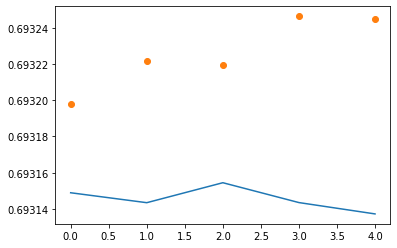

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.6932 - acc: 0.5000


IMDB Classification using simple RNN

In [21]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [22]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [23]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words,16))
rnn.add(layers.SimpleRNN(32,return_sequences='True'))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1))
rnn.compile(optimizer='nadam',loss='mse')

In [24]:
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          1568      
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 163,681
Trainable params: 163,681
Non-trainable params: 0
________________________________________________

In [26]:
history=rnn.fit(X_train,y_train,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 22s 35ms/step - loss: 0.2327 - val_loss: 0.1311
Epoch 2/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1194 - val_loss: 0.1254
Epoch 3/30
625/625 [==============================] - 21s 34ms/step - loss: 0.0892 - val_loss: 0.1230
Epoch 4/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0696 - val_loss: 0.1277
Epoch 5/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0518 - val_loss: 0.1376
Epoch 6/30
625/625 [==============================] - 22s 34ms/step - loss: 0.0382 - val_loss: 0.1423
Epoch 7/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0287 - val_loss: 0.1511
Epoch 8/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0211 - val_loss: 0.1520
Epoch 9/30
625/625 [==============================] - 22s 35ms/step - loss: 0.0184 - val_loss: 0.1551
Epoch 10/30
625/625 [==============================] - 23s 36ms/step - loss: 0.018

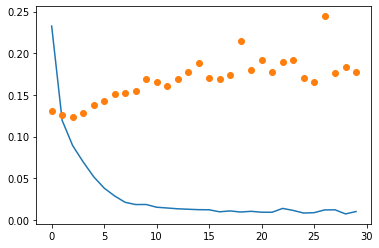

In [27]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

In [40]:
  print(rnn.predict(X_train))

[[0.9802931 ]
 [0.05136767]
 [0.02640399]
 ...
 [0.01403308]
 [0.98924446]
 [0.6215755 ]]
